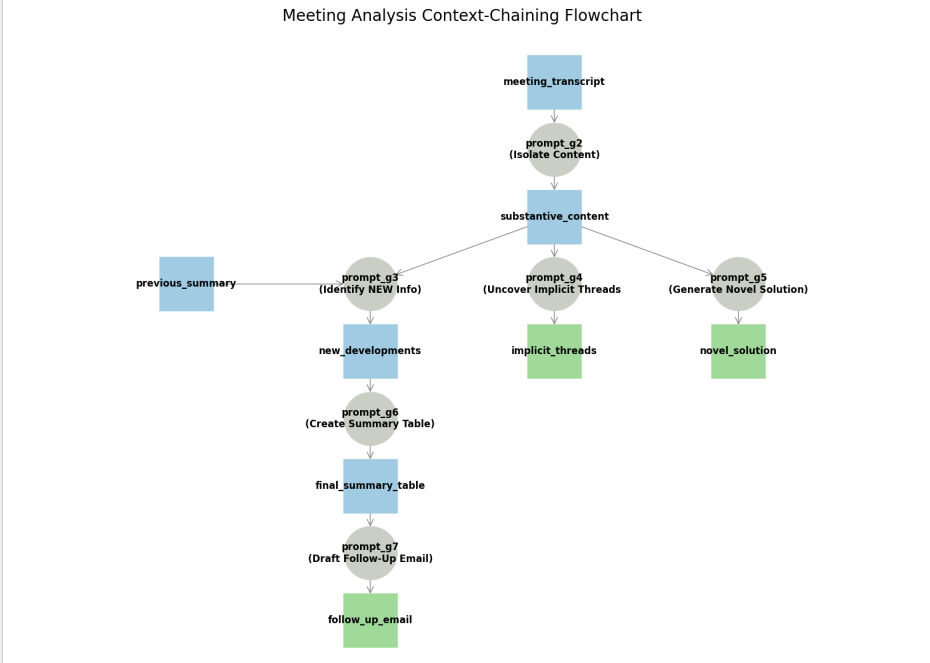

In [1]:
from IPython.display import Image, display
display(Image('../media/contex_chainning.png'))


# Signal vs Noise in Meeting Transcripts

In a meeting transcript, **signal** is any utterance that changes the shared operational state of the group. **Noise** is any utterance that does not. The distinction is not stylistic; it is functional.

## Example: Raw Transcript Fragment

> “Okay, so yeah, I think we’re all aligned here. As we discussed last week, the API latency is too high. We should probably prioritize fixing that. John, can you take a look? I mean, unless someone disagrees.”

## Sentence-Level Analysis

The first sentence — *“Okay, so yeah, I think we’re all aligned here”* — is pure noise. It performs social alignment but introduces no new fact, decision, or obligation. Removing it changes nothing downstream.

The second sentence — *“As we discussed last week, the API latency is too high”* — is repetitive noise. It explicitly marks the information as already known. It adds no delta unless a new metric, constraint, or deadline is attached.

The third sentence — *“We should probably prioritize fixing that”* — is weak signal. It expresses intent but not commitment. Whether it survives isolation depends on whether such phrasing is treated as a decision or merely discussion in that organization.

The fourth sentence — *“John, can you take a look?”* — is hard signal. It assigns ownership. Removing it would change who is responsible.

The final clause — *“I mean, unless someone disagrees”* — is noise again. It hedges socially but does not negate the assignment unless disagreement actually occurs.

## Result After Isolation

After isolation, the substantive content collapses to:

> **“API latency issue acknowledged. John assigned to investigate.”**

## Repetition and Semantic Collapse

Later in the meeting, suppose someone says:

> “So just to repeat, John will handle the latency issue.”

This contains no new signal. Its semantic content is identical to the earlier assignment. Even with different wording, the meaning collapses to the same proposition, so it is removed.

Now consider:

> “John will handle the latency issue by Wednesday.”

This is new signal. Although the assignment is repeated, the deadline introduces a new constraint, so it survives isolation.

## Conversational Noise Examples

Noise also includes conversational scaffolding such as:

> “Sorry to interrupt,”  
> “Just thinking out loud,”  
> “This might be a dumb question,”  
> “Let’s park this for now,”

Only the last example can become signal, and only if it implies a state change, such as explicitly deferring a decision.

## The Deletion Test

Signal is detected using a deletion test. If removing a sentence makes it impossible to answer questions like:

- What was decided?
- Who owns this?
- What changed?
- What constraint now exists?

then the sentence was signal. If removal has no effect on those answers, it was noise.

## Why Isolation Comes First

This is why the diagram isolates substantive content first. The system is not summarizing language. It is extracting a **state transition log** from human conversation. Everything else — fillers, repetition, hedging, reaffirmation — is noise because it does not move the state forward.

In [7]:
from openai import OpenAI 
from dotenv import load_dotenv
import os  
load_dotenv()
api_key = os.getenv("API")


In [9]:
from openai import OpenAI

client = OpenAI(
  base_url="https://openrouter.ai/api/v1",
  api_key= api_key,
)


## meeting transcript

In [11]:
meeting_transcript = """
Tom: Morning all. Coffee is still kicking in.
Sarah: Morning, Tom. Right, let's jump in. Project Phoenix
timeline. Tom, you said the backend components are on track?
Tom: Mostly. We hit a small snag with the payment gateway
integration. It's... more complex than the docs suggested. We might need
another three days.
Maria: Three days? Tom, that's going to push the final testing
phase right up against the launch deadline. We don't have that buffer.
Sarah: I agree with Maria. What's the alternative, Tom?
Tom: I suppose I could work over the weekend to catch up. I'd
rather not, but I can see the bind we're in.
Sarah: Appreciate that, Tom. Let's tentatively agree on that.
Maria, what about the front-end?
Maria: We're good. In fact, we're a bit ahead. We have some extra
bandwidth.
Sarah: Excellent. Okay, one last thing. The marketing team wants to
do a big social media push on launch day. Thoughts?
Tom: Seems standard.
Maria: I think that's a mistake. A big push on day one will swamp
our servers if there are any initial bugs. We should do a soft launch,
invite-only for the first week, and then do the big push. More controlled.
Sarah: That's a very good point, Maria. A much safer strategy.
Let's go with that. Okay, great meeting. I'll send out a summary.
Tom: Sounds good. Now, more coffee.
"""

separate signal from noise in
meeting_transcript: extract decisions, updates, and issues; set aside greetings and small talk.

- Isolating Content from Noise

In [ ]:
prompt_g2 = f"""
Analyze the following meeting transcript. Your task is to isolate
the substantive content from the conversational noise.
- Substantive content includes: decisions made, project updates,
problems raised, and strategic suggestions.
- Noise includes: greetings, pleasantries, and off-topic remarks
(like coffee).
Return ONLY the substantive content.
Transcript:
---
{meeting_transcript}
---
"""

In [25]:
from openai import OpenAI

client = OpenAI(
  base_url="https://openrouter.ai/api/v1",
  api_key= api_key,
)


In [36]:
response_g2= client.chat.completions.create(
    model="mistralai/devstral-2512:free",
    messages=[
        {"role": "user" , "content": prompt_g2}
    ],
    extra_body={"reasoning": {"enabled": True}}
)

In [37]:
substantive_content= response_g2.choices[0].message.content
print(substantive_content)

**Substantive Content:**

- **Project Phoenix Timeline:**
  - Backend components are mostly on track, but payment gateway integration is more complex than expected, requiring an additional three days.
  - The delay risks pushing the final testing phase against the launch deadline, with no buffer remaining.

- **Proposed Solution:**
  - Tom agrees to work over the weekend to mitigate the delay.

- **Front-End Status:**
  - Front-end development is ahead of schedule, with extra bandwidth available.

- **Marketing Strategy:**
  - Marketing team plans a big social media push on launch day.
  - Maria suggests a soft launch (invite-only for the first week) to avoid server overload from potential bugs, followed by a broader push.
  - The team agrees to adopt Maria’s controlled launch strategy.


### new development g3

In [40]:
previous_summary ="""In our last meeting, we finalized the goals for Project Phoenix and
assigned backend work to Tom and front-end to Maria."""

In [41]:
prompt_g3= f""" You are given TWO inputs.

INPUT 1 (Previous State):
The summary of the last meeting:
"{previous_summary}"

INPUT 2 (Current State):
Substantive content from the new meeting:
"{substantive_content}"

TASK:
Compare INPUT 2 against INPUT 1.
Output ONLY information that is NEW.

INCLUDE:
- New decisions
- New problems or risks
- New commitments or ownership
- New constraints or deadlines

EXCLUDE:
- Anything already present in INPUT 1
- Reworded or repeated information
- Background or explanations

OUTPUT:
A concise list or short paragraph containing ONLY the new developments.
"""


In [45]:
response_g3= client.chat.completions.create(
    model="mistralai/devstral-2512:free",
    messages=[
        {"role": "user" , "content": prompt_g3}
    ],
    extra_body={"reasoning": {"enabled": True}}
)

In [47]:
new_developments= response_g3.choices[0].message.content
print(new_developments)

- **New Problems/Risks:**
  - Payment gateway integration is more complex than expected, causing a 3-day delay.
  - Delay risks pushing final testing against the launch deadline with no buffer.

- **New Commitments/Ownership:**
  - Tom agrees to work over the weekend to mitigate the delay.

- **New Decisions:**
  - Adopt Maria’s controlled launch strategy (soft launch for the first week, then broader push).

- **New Constraints/Deadlines:**
  - No buffer remains for final testing due to the delay.


## Layer 2: Conducting the investigation (the “how”)


Now we move from identifying facts to generating insights, the core of the semantic context
interpretation journey. This is where the prompt asks the AI to read between the lines.

In [58]:
## uncovering Implicit Threads
prompt_g4 = f"""

Task : Analyze the following meetings content for implicit social dynamics and unstaged feelings. 
Go beyond the literal words. and anwere these question

     - Did anyone seem hesistant or reluctant despite agreeing to someting? 
     - Were there any underlying disagrement or tensions?
     - What was the overall Mood?

Meeting Content : 

________________

{substantive_content}

___________ 
""" 

In [59]:
response_g4= client.chat.completions.create(
    model="mistralai/devstral-2512:free",
    messages=[
        {"role": "user" , "content": prompt_g4}
    ],
    extra_body={"reasoning": {"enabled": True}}
)



implicit_threads= response_g4.choices[0].message.content
print(implicit_threads)

Here’s an analysis of the implicit social dynamics and unstaged feelings in the meeting, based on the provided content:

### **1. Did anyone seem hesitant or reluctant despite agreeing to something?**
- **Tom’s agreement to work over the weekend** may carry implicit reluctance. While he verbally agrees, the fact that the delay was unforeseen (payment gateway complexity) and that he’s now expected to compensate with personal time suggests potential resentment or stress. His agreement could be performative—avoiding conflict or appearing uncooperative—rather than enthusiastic.
- **Maria’s soft launch suggestion** was adopted, but the quick consensus might mask hesitation from others. For example, the marketing team’s "big social media push" plan could clash with a controlled launch, implying they may have privately preferred a full launch but deferred to avoid debate.

### **2. Were there any underlying disagreements or tensions?**
- **Backend vs. Front-End Dynamics:**
  The backend delay

##  now  solve the problem 